# Библиотека __atmons__

In [1]:
from atmons import *
import matplotlib.pyplot as plt

In [2]:
config, grid = loader()
config['spec_key'] = 'be'
config['chem'] = 's1'

grid['n_nu'] = 500
grid['n_theta'] = 6
grid['n_phi'] = 12

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum = []

for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    # if FLUX_REL[counter-1] == 0.1:
    #     plt.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, linestyle='dashed', color='blue')
    #     break
    counter += 1

1  | 0.115452
2  | 0.173035
3  | 0.230661
4  | 0.345663
5  | 0.461324
6  | 0.577974
7  | 0.635186
8  | 0.692166
9  | 0.748806
10 | 0.808123
11 | 0.866032
12 | 0.923209
13 | 0.981114
14 | 1.039087
15 | 1.097004
16 | 1.131905
17 | 1.155052
18 | 1.174328
19 | 1.199019
20 | 1.219407
21 | 1.222086
22 | 1.227322
23 | 1.233728


1  | 0.119120
1  | 0.097651


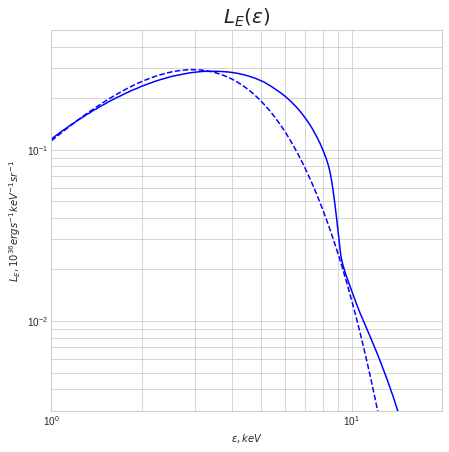

In [3]:
plt.style.use('seaborn-whitegrid')
_, ax = plt.subplots(figsize=(7,7))

ax.set_title("$L_E(\\varepsilon)$", loc='center', fontsize=20)
ax.set_xlabel("$\\varepsilon, keV$")
ax.set_ylabel("$L_E, 10^{36} erg s^{-1} keV^{-1} sr^{-1} $")

ax.set_ylim(0.003, 0.5)
ax.set_xlim(1.0, 20)
ax.grid(True, which='minor')

config, grid = loader()
config['spec_key'] = 'be'
config['chem'] = 's1'
config['rel'] = True

config['m_ns'] = 1.519
config['r_ns'] = 15.48
config['v_rot'] = 700

grid['n_nu'] = 500
grid['n_theta'] = 30
grid['n_phi'] = 60
grid['rng_erg'] = [1.0, 50.0]
config['i_ang'] = 0 # 45 # 90 
config['flux_key'] = 1 # 2

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum = []
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    if FLUX_REL[counter-1] == 0.1:
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, color='blue')
        break
    counter += 1


config, grid = loader("paper")
config['spec_key'] = 'wfc'

dumper('paper', config, grid)
config, grid = loader("paper")

ns = NeurtonStar(config,grid)
burst = ns.burst()
counter = 1
Lum = []
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    if FLUX_REL[counter-1] == 0.1:
        ax.loglog(shot.E_null/shot.E_null.unit, shot.B_real/shot.B_real.unit/10**36, linestyle='dashed', color='blue')
        break
    counter += 1


plt.savefig('graph/' + "fig_7b" + '.pdf')


In [9]:
import astropy.units as u 
PI

3.141592653589793

In [4]:
# burst = ns.burst()
# counter = 1
# Lum = []
# plt.style.use('seaborn-whitegrid')
# for shot in burst:
#     print(f"{counter:<3}| {shot.lum:.6f}")
#     plt.plot(log(shot.E_null/shot.E_null.unit), log(shot.B_real/shot.B_real.unit) - 36,)
#     counter += 1

In [5]:
dshot = shot._output()
for key in dshot:
    if str(type(dshot[key])) != "<class 'function'>" and str(type(dshot[key])) != "<class 'tuple'>" and str(type(dshot[key])) != "<class 'int'>" :
        if str(type(dshot[key])) != "<class 'numpy.ndarray'>" and str(type(dshot[key])) != "<class 'numpy.float64'>":
            print(f"{key}: {dshot[key].unit}")
        # if str(type(dshot[key])) == "<class 'numpy.ndarray'>":
        #     print(f"{key}: {type(dshot[key])}")

flux: 
Flux: erg / (s cm2)
T_eff: K
Epsilon_eff: keV
Flux_edd_real: erg / (s cm2)
wwf_T: 
tcf_T: keV
tcf_T_E: keV
wwf_T_E: 
rho: erg / (keV s cm2)
I_e: erg / (keV s cm2)
B_Omega: erg / (keV s cm2)
B_int: erg / (keV s)
dOmega_real: cm2
area_real: cm2
B_int_real: erg / (keV s)
B_real: erg / (keV s)
Lum: erg / s
lum: 
E_null: keV


In [8]:
print(dshot['fc'])

1.28018815744


In [6]:
dsurf = surf._output()
for key in dsurf:
    if str(type(dsurf[key])) != "<class 'function'>" and str(type(dsurf[key])) != "<class 'tuple'>":
        if str(type(dsurf[key])) != "<class 'numpy.ndarray'>":
            print(f"{key}: {dsurf[key].unit}", end=" | ")
        # if str(type(dsurf[key])) == "<class 'numpy.ndarray'>":
        #     print(f"{key}: {type(dsurf[key])}")

r_0: km | R_0: cm | phi_init: deg | theta_init: deg | theta_init_sym: deg | phi: rad | theta: rad | theta_sym: rad | r_init: km | R: cm | sin_th:  | cos_th:  | sin_ph:  | cos_ph:  | dR: cm | u:  | r_bar: cm | u_bar:  | nu:  | B:  | zeta:  | omega_bar: 1 / s | beta_ph:  | g_th:  | f_th:  | sin_eta:  | cos_eta:  | beta:  | gamma:  | grv: cm / s2 | log_g:  | sin_psi:  | cos_psi:  | G_yu:  | D:  | sin_a:  | cos_a:  | cos_chi:  | cos_sig:  | cos_xi:  | delta:  | cos_sig_1:  | E: keV | dE: keV | E_real: keV | dS: cm2 | area: cm2 | R_pr: cm | dOmega: cm2 | dOmega_E: cm2 | 

In [12]:
print(dsurf['dOmega_E'])
# self.theta, self.cos_eta, self.R, N_ph, N_th, self.ph_range, self.th_range

[[[9.43612482e+10 9.43612482e+10 9.43612482e+10 ... 9.43612482e+10
   9.43612482e+10 9.43612482e+10]
  [2.64132886e+11 2.64132886e+11 2.64132886e+11 ... 2.64132886e+11
   2.64132886e+11 2.64132886e+11]
  [4.11040017e+11 4.11040017e+11 4.11040017e+11 ... 4.11040017e+11
   4.11040017e+11 4.11040017e+11]
  [3.14883296e+11 3.14883296e+11 3.14883296e+11 ... 3.14883296e+11
   3.14883296e+11 3.14883296e+11]
  [1.15381252e+11 1.15381252e+11 1.15381252e+11 ... 1.15381252e+11
   1.15381252e+11 1.15381252e+11]
  [1.95715899e+10 1.95715899e+10 1.95715899e+10 ... 1.95715899e+10
   1.95715899e+10 1.95715899e+10]]

 [[9.10670338e+10 9.10670338e+10 9.10670338e+10 ... 9.10670338e+10
   9.10670338e+10 9.10670338e+10]
  [2.40241128e+11 2.40241128e+11 2.40241128e+11 ... 2.40241128e+11
   2.40241128e+11 2.40241128e+11]
  [3.53067074e+11 3.53067074e+11 3.53067074e+11 ... 3.53067074e+11
   3.53067074e+11 3.53067074e+11]
  [2.56436309e+11 2.56436309e+11 2.56436309e+11 ... 2.56436309e+11
   2.56436309e+11 2.56

In [8]:
dns = par._output()
for key in dns:
    if str(type(dns[key])) != "<class 'function'>" and str(type(dns[key])) != "<class 'tuple'>":
        print(f"{key}: {dns[key].unit}", end=" | ")

r: km | m: solMass | r_eq: km | m_cor: solMass | R: cm | M: g | R_sch: cm | zsch:  | g: cm / s2 | log_g:  | area_0: cm2 | X_hyd:  | kappa_e: cm2 / g | w_b:  | T_c: keV | Flux_edd: erg / (s cm2) | T_edd: K | Theta_edd: erg | Epsilon_edd: keV | Lum_edd: erg / s | Lum_obs: erg / s | nu_rot: Hz | incl_ang: rad | sin_i:  | cos_i:  | omega_rot: 1 / s | v_cr: Hz | v_rel:  | M_cor: g | R_eq: cm | R_sch_cor: cm | chi:  | Omega:  | q_c:  | b_c:  | i_bar:  | I: cm2 g | J: cm2 g / s | g_0: cm / s2 | 

In [67]:
import astropy.units as u 
# create units
speed = 15 * u.m / u.s  
print(speed)

# dimensionality of units
print(speed.unit)
# value of units
print(speed.value)

# array of units
L = np.array([1, 2, 3]) * u.m 
print(L)

# object contructor
v_0 = u.Quantity(20, u.m / u.s) 
u_0 = u.Quantity('15 m/s')
print(v_0 + u_0)

# translation to other systems
q = 2.4 * u.m / u.s 
# to specific units
print(q.to(u.km / u.h))
# to SI
print(q.si)
# to CGS
print(q.cgs)

# simplifing units
kappa = 20. * u.cm / (1. * u.m)
print(kappa.decompose())

# angle units
q = 30. * u.deg
import numpy as np
print(np.sin(q))

from astropy.constants import h, k_B, c
nu = 3 * u.GHz
T = 30 * u.K
print(np.exp(-h * nu / (k_B * T)))


a = np.arange(5.)
print(a)
b = a << u.m
print(b)
a <<= u.m
print(a)

v_1 = 0.5 * c
print(v_1.to(u.cds.c))

15.0 m / s
m / s
15.0
[1. 2. 3.] m
35.0 m / s
8.639999999999999 km / h
2.4 m / s
240.0 cm / s
0.2
0.49999999999999994
0.9952122548924741
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.] m
[0. 1. 2. 3. 4.] m
0.5 c


In [ ]:
config, grid = loader()
# config['spec_key'] = 'be'
# config['spec_key'] = 'wfc'
grid['n_nu'] = 500
grid['n_theta'] = 6
grid['n_phi'] = 12

dumper('paper', config, grid)
config, grid = loader("paper")

In [3]:
ns = NeurtonStar(config, grid)

1  | 0.095424
2  | 0.139533
3  | 0.183614
4  | 0.274545
5  | 0.369609
6  | 0.466145
7  | 0.514195
8  | 0.562156
9  | 0.610019
10 | 0.659162
11 | 0.707506
12 | 0.755926
13 | 0.805268
14 | 0.854967
15 | 0.907093
16 | 0.938632
17 | 0.962140
18 | 0.980288
19 | 1.005630
20 | 1.028167
21 | 1.032319
22 | 1.032319
23 | 1.032319


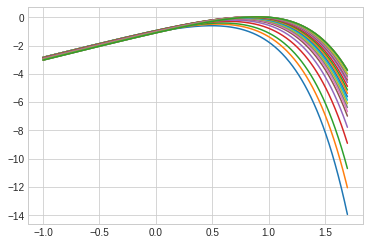

In [10]:
burst = ns.burst()
counter = 1
Lum = []
plt.style.use('seaborn-whitegrid')
for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    plt.plot(log(shot.E_null), log(shot.B_real) - 36,)
    counter += 1


In [7]:
burst = ns.burst()
counter = 1
Lum_r, Fc_r, W_r = [], [], []

for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    Lum_r.append(shot.lum)
    Fc_r.append(shot.fc)
    W_r.append(shot.w)
    counter += 1

1  | 0.095456
2  | 0.139585
3  | 0.183680
4  | 0.274633
5  | 0.369726
6  | 0.466290
7  | 0.514356
8  | 0.562322
9  | 0.610211
10 | 0.659363
11 | 0.707727
12 | 0.756158
13 | 0.805521
14 | 0.855231
15 | 0.907378
16 | 0.938925
17 | 0.962455
18 | 0.980600
19 | 1.005944
20 | 1.028504
21 | 1.032568
22 | 1.032568
23 | 1.032568


In [ ]:
print(0.7658143407933556/1.032319186017881)

In [2]:
burst = ns.burst()
counter = 1
Lum, Fc, W = [], [], []

for shot in burst:
    print(f"{counter:<3}| {shot.lum:.6f}")
    Lum.append(shot.lum)
    Fc.append(shot.fc)
    W.append(shot.w)
    counter += 1

AttributeError: module 'atmons.ns' has no attribute 'burst'

[<Quantity 0.09655216>, <Quantity 0.14470859>, <Quantity 0.19290063>, <Quantity 0.2890767>, <Quantity 0.38580342>, <Quantity 0.48335773>, <Quantity 0.53120363>, <Quantity 0.57885577>, <Quantity 0.62622376>, <Quantity 0.67582995>, <Quantity 0.72425908>, <Quantity 0.7720757>, <Quantity 0.82050203>, <Quantity 0.86898417>, <Quantity 0.91742015>, <Quantity 0.94660774>, <Quantity 0.96596574>, <Quantity 0.98208562>, <Quantity 1.00273522>, <Quantity 1.01978541>, <Quantity 1.02202563>, <Quantity 1.02640436>, <Quantity 1.03176201>]
[0.15937783910400002, 0.15480104038400003, 0.146261152768, 0.131351979008, 0.12029071872, 0.11157308928000001, 0.10773047398400001, 0.103921378304, 0.099990477824, 0.09589717094400001, 0.09136121343999999, 0.08633082163199998, 0.08056235929599999, 0.07392749875200001, 0.065900575744, 0.06061770854400001, 0.05803195904000001, 0.05237047193600001, 0.047660526592000006, 0.040246727680000004, 0.03899521331200001, 0.03810977894400001, 0.038370827264]


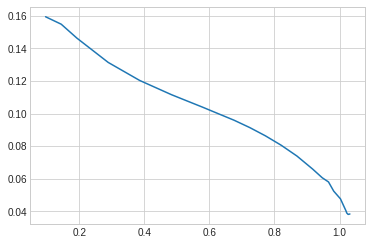

In [8]:
print(Lum)
print(W)
plt.plot(Lum, W)

[<Quantity 0.09655216>, <Quantity 0.14470859>, <Quantity 0.19290063>, <Quantity 0.2890767>, <Quantity 0.38580342>, <Quantity 0.48335773>, <Quantity 0.53120363>, <Quantity 0.57885577>, <Quantity 0.62622376>, <Quantity 0.67582995>, <Quantity 0.72425908>, <Quantity 0.7720757>, <Quantity 0.82050203>, <Quantity 0.86898417>, <Quantity 0.91742015>, <Quantity 0.94660774>, <Quantity 0.96596574>, <Quantity 0.98208562>, <Quantity 1.00273522>, <Quantity 1.01978541>, <Quantity 1.02202563>, <Quantity 1.02640436>, <Quantity 1.03176201>]
[1.5682310425600003, 1.5692456806400001, 1.5843744563200002, 1.62196016384, 1.6593162470400005, 1.6946360012800001, 1.7105935923200004, 1.7269966233600003, 1.7445892019200002, 1.7654426240000003, 1.78856853248, 1.81556108288, 1.84964496384, 1.89295813888, 1.953583488, 1.9981392179200002, 2.0152081817600003, 2.079143744, 2.13004818176, 2.23676818176, 2.24604818176, 2.24720818176, 2.21820818176]


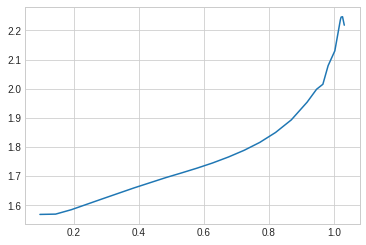

In [9]:
print(Lum)
print(Fc)
plt.plot(Lum, Fc)

In [7]:
print(Lum_r)
print(Fc_r)
plt.plot(Lum_r, Fc_r)

NameError: name 'Lum_r' is not defined

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

TODO:
- Проверить границы E и dE
- Понять, почему поток такой маленький
- Возможно раскидать по файлам оригинальные спектры
(походу слишком долго читается)